In [41]:
## import step

In [173]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [174]:
## get , display and clean data

In [175]:
df = pd.read_csv("C:\\Users\\AL3MD\\Desktop\\archive\\Vgsales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [176]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [177]:
# check to null values 
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [178]:
## fillna Year
x = df["Year"].mean()
df["Year"].fillna(x,inplace=True)

In [179]:
# check to null values 
df.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [180]:
##fill Publsher
df["Publisher"].fillna('NoPoblisher',inplace=True)

In [181]:
# check to null values 
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [182]:
## which string data we mush drop base on number unique value

In [183]:
print(df['Genre'].nunique())
print(df['Name'].nunique())
print(df['Publisher'].nunique())
print(df['Platform'].nunique())

12
11493
579
31


## I will drop (Name,Publisher,Platform)

In [184]:
## drop Publsher , Platform and Name
df.drop(['Name', 'Platform','Publisher'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Year          16598 non-null  float64
 2   Genre         16598 non-null  object 
 3   NA_Sales      16598 non-null  float64
 4   EU_Sales      16598 non-null  float64
 5   JP_Sales      16598 non-null  float64
 6   Other_Sales   16598 non-null  float64
 7   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


## Show some fig

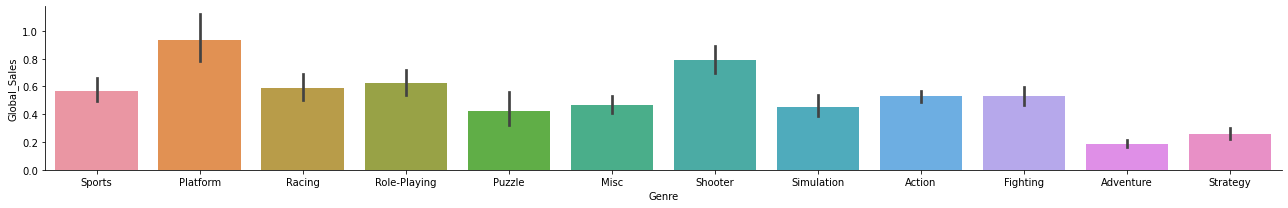

In [190]:
sns.catplot(x = 'Genre',y='Global_Sales',kind='bar',data=df,height=3,aspect=6);

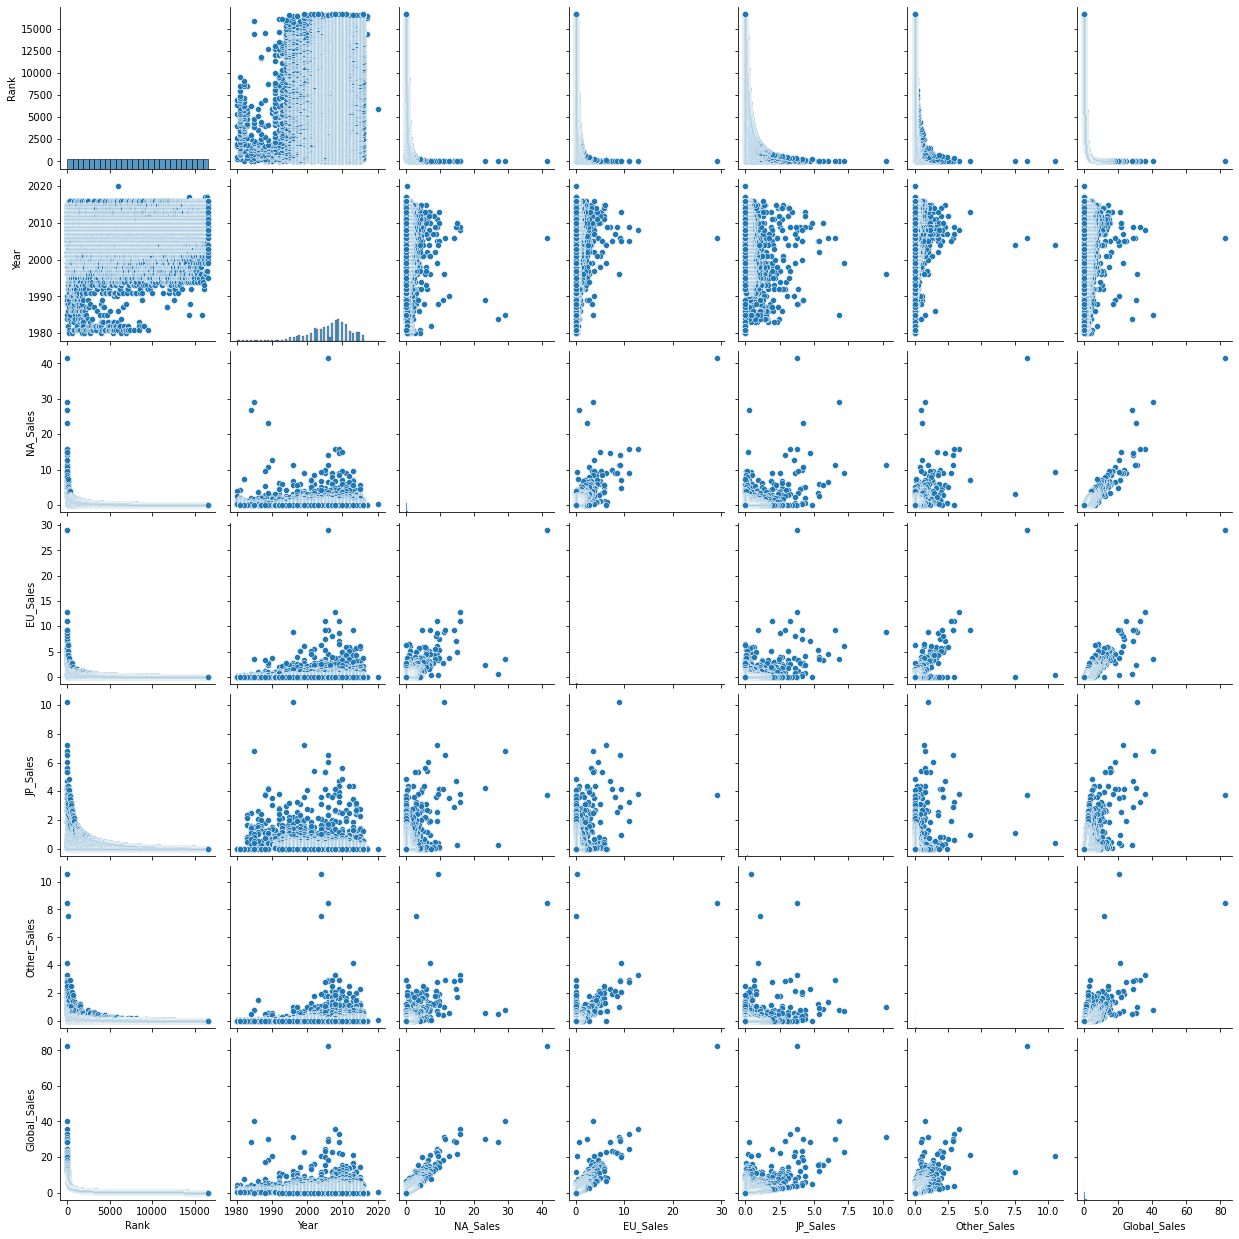

In [191]:
sns.pairplot(df);

## create module

In [192]:
## Rename Genre column data unique to Numbers
df=pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                16598 non-null  int64  
 1   Year                16598 non-null  float64
 2   NA_Sales            16598 non-null  float64
 3   EU_Sales            16598 non-null  float64
 4   JP_Sales            16598 non-null  float64
 5   Other_Sales         16598 non-null  float64
 6   Global_Sales        16598 non-null  float64
 7   Genre_Action        16598 non-null  uint8  
 8   Genre_Adventure     16598 non-null  uint8  
 9   Genre_Fighting      16598 non-null  uint8  
 10  Genre_Misc          16598 non-null  uint8  
 11  Genre_Platform      16598 non-null  uint8  
 12  Genre_Puzzle        16598 non-null  uint8  
 13  Genre_Racing        16598 non-null  uint8  
 14  Genre_Role-Playing  16598 non-null  uint8  
 15  Genre_Shooter       16598 non-null  uint8  
 16  Genr

In [193]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Genre_Action',axis=1),
                                                    df['Genre_Action'], test_size=0.2,
                                                    random_state=101)

In [194]:
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train, y_train)

LogisticRegression(C=1000)

In [195]:
lm1.score(X_train, y_train)

0.798689561680976

In [196]:
lm1.score(X_test, y_test)

0.8063253012048193

## Now we have accuracy 80.6%